In [1]:
import modelframe as mf
import models as ms
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
def read_in_data(directory : str, conversion_dict : dict[int,int] = {0:0,1:1,2:2,3:3,4:4,5:5,6:6}):
    data = np.load(directory)
    features =  data[:,:-1]
    labels = data[:,-1]
    for original, new in conversion_dict.items():
        labels[labels == original] = new
    return torch.tensor(features).float(), torch.tensor(labels).long()
    

### Binary Network
Uses a binary classification: the signal corresponds to a gravitational wave or a "glitch" which originates from other cosmic events or noise.

In [3]:
binary_model_directory = "../model/model-test-binary-001"

binary_features, binary_labels = read_in_data("../data/dataset_all_H1_bootstrap_O3a.npy", {0:0,1:1,2:1,3:1,4:1,5:1,6:1})

binary_model = ms.GlitchClassifier(6, 32, 2)

binary_frame = mf.GlitchModel(binary_model, binary_features, binary_labels, device = 'cuda')
binary_frame.number_of_epochs = 250
binary_frame.learning_rate = 0.00001
binary_frame.setup(256)
binary_frame.train()
binary_frame.test_model()
binary_frame.save_model(binary_model_directory, name = "model.pt")

Epoch 1/1000, Train Loss: 4.2011, Val Loss: 3.6737, Precision: 0.0095, Recall: 0.0074, Accuracy: 0.7487
Epoch 2/1000, Train Loss: 3.4101, Val Loss: 2.9003, Precision: 0.0088, Recall: 0.0074, Accuracy: 0.7394
Epoch 3/1000, Train Loss: 2.6790, Val Loss: 2.2350, Precision: 0.0113, Recall: 0.0112, Accuracy: 0.7201
Epoch 4/1000, Train Loss: 2.0176, Val Loss: 1.6634, Precision: 0.0122, Recall: 0.0149, Accuracy: 0.6878
Epoch 5/1000, Train Loss: 1.4857, Val Loss: 1.2271, Precision: 0.0172, Recall: 0.0260, Accuracy: 0.6495
Epoch 6/1000, Train Loss: 1.1214, Val Loss: 0.9775, Precision: 0.0274, Recall: 0.0706, Accuracy: 0.5106
Epoch 7/1000, Train Loss: 0.9474, Val Loss: 0.8840, Precision: 0.0478, Recall: 0.1710, Accuracy: 0.3976
Epoch 8/1000, Train Loss: 0.8809, Val Loss: 0.8396, Precision: 0.0555, Recall: 0.2100, Accuracy: 0.3786
Epoch 9/1000, Train Loss: 0.8430, Val Loss: 0.8057, Precision: 0.0549, Recall: 0.2026, Accuracy: 0.3902
Epoch 10/1000, Train Loss: 0.8171, Val Loss: 0.7825, Precision: 

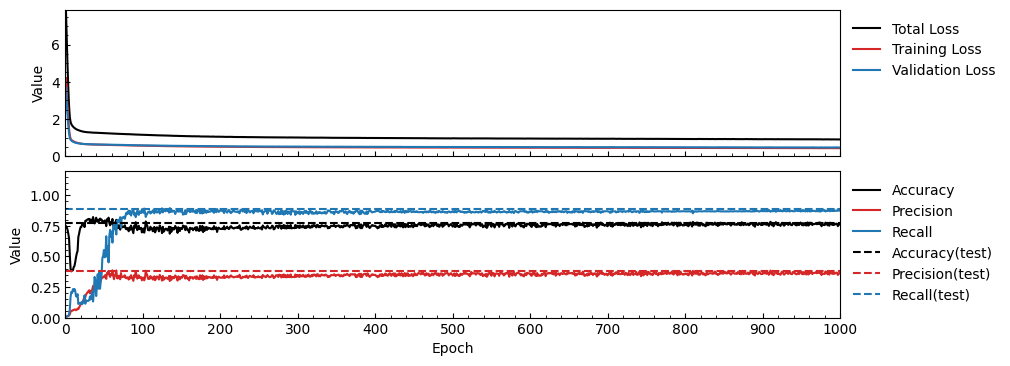

In [17]:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os

epochs = np.arange(1, binary_frame.number_of_epochs+1, 1)


fig, ax = plt.subplots(2, 1, squeeze=  False, figsize = (10, 4),sharex=True)
ax[0,0].plot(epochs, binary_frame.training_loss + binary_frame.validiation_loss, label = r"Total Loss", zorder= 1, color = "k")
ax[0,0].plot(epochs, binary_frame.training_loss, label = r"Training Loss",zorder = 1, color = "tab:red")
ax[0,0].plot(epochs, binary_frame.validiation_loss, label = r"Validation Loss",zorder = 1, color = "tab:blue")
ax[1,0].plot(epochs, binary_frame.accuracy, label = r"Accuracy",zorder = 1, color = "k")
ax[1,0].plot(epochs, binary_frame.precision, label = r"Precision",zorder = 1, color = "tab:red")
ax[1,0].plot(epochs, binary_frame.recall, label = r"Recall",zorder = 1, color = "tab:blue")

ax[1,0].axhline(binary_frame.test_accuracy, label = r"Accuracy(test)", zorder = 1, color = "k", linestyle = "dashed")
ax[1,0].axhline(binary_frame.test_precision, label = r"Precision(test)", zorder = 1, color = "tab:red", linestyle = "dashed")
ax[1,0].axhline(binary_frame.test_recall, label = r"Recall(test)", zorder = 1, color = "tab:blue", linestyle = "dashed")

# ax[0,0].axhline((total_loss).mean(),zorder= 0,color = "k", linestyle = "dotted")
# ax[0,0].axhline((total_accuracy).mean(),zorder= 0,color = "k", linestyle = "dotted")
ax[0,0].set_ylabel(r"Value")
ax[1,0].set_ylabel(r"Value")
for i in range(2):
    ax[i,0].tick_params(axis="y",direction="in",which="both")
    ax[i,0].tick_params(axis="x",direction="in",which="both")
    # ax[i,0].set_yticks(np.arange(0, np.max(total_loss), int(np.max(total_loss)) /10))
    ax[i,0].set_xticks(np.arange(0, binary_frame.number_of_epochs + 1, binary_frame.number_of_epochs // 10))
    ax[i,0].xaxis.set_minor_locator(MultipleLocator(binary_frame.number_of_epochs//50))
    ax[i,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].set_xlabel(r"Epoch")
# ax[0,0].set_ylabel("Value")
ax[0,0].set_xlim(0, binary_frame.number_of_epochs)
ax[0,0].set_ylim(0, np.max(binary_frame.training_loss + binary_frame.validiation_loss))
ax[1,0].set_ylim(0, 1.2)
ax[0,0].legend(frameon=False, ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
ax[1,0].legend(frameon=False, ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
fig.subplots_adjust(hspace=0.1)

os.makedirs(f"{binary_model_directory}/figures", exist_ok=True)
fig.savefig(f"{binary_model_directory}/figures/performance-overview-1.pdf", bbox_inches = "tight")

# ax[0,0].grid(True,which="minor")

### Multiclass Network